# Sentiment Analysis
### It is the topic where we finds the sentiment on the text whether it was the positive or negative or neutral on the data.
### Application Finding vulnerable tweets on twitter or finding negative commands in social media.
## Goal : Find Sentiment on the text .

In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [9]:
os.getcwd()

'C:\\Users\\Sathish G\\sentiment-analysis\\research'

In [10]:
cd ..

C:\Users\Sathish G\sentiment-analysis


In [12]:
os.getcwd()

'C:\\Users\\Sathish G\\sentiment-analysis'

In [59]:
df = pd.read_csv("data/data.csv",encoding='latin1')

In [60]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


## Select only the required columns

In [61]:
df = df.loc[:,['text','sentiment']]

In [62]:
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [63]:
df['text']=df['text'].astype('str')

In [64]:
df.iloc[4,1]

'negative'

### No of Neutral Command -----> 11118
### No of Negative Command ----> 8582
### No of Positive Command ----->7781

In [65]:
sentiment_cnts = df['sentiment'].value_counts()

Text(0.5, 1.0, 'No of Sentiments')

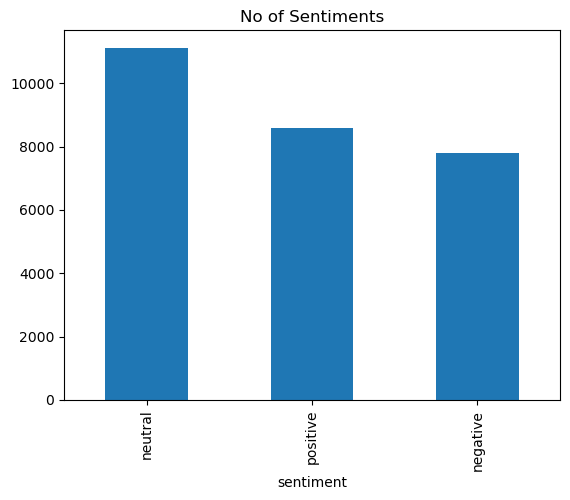

In [66]:
sentiment_cnts.plot(kind='bar')
plt.title("No of Sentiments")

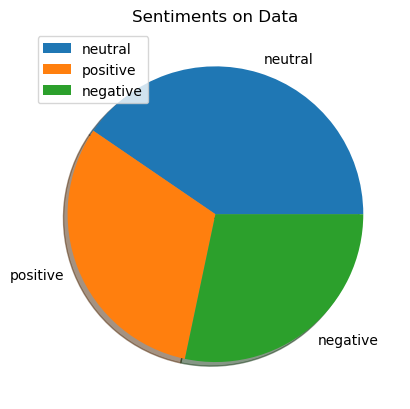

In [67]:
plt.pie(sentiment_cnts,labels=sentiment_cnts.index,shadow=True)
plt.title("Sentiments on Data")
plt.legend()
plt.show()

### Data Preprocessing 
#### Converting the data into the model expected format where remove stopwords, apply lemmatization , remove the punctuations and removing numbers becuase they are not playing the important role in classifying sentiments.

In [69]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stem = PorterStemmer()
def function(x):
    # print(1)
    words = re.sub("[^a-zA-Z]"," ",x)
    # print(2)
    words = words.split()
    words = [word.strip() for word in words]
    # print(3)
    words = [stem.stem(word) for word in words if word not in stopwords.words('english')]
    return " ".join(words)

In [70]:
df['text'] = df['text'].apply(function)